## Video Game Sales Prediction

Data source: https://www.kaggle.com/datasets/gregorut/videogamesales

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow_addons.metrics import RSquare

/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/home/aditya/miniconda3/envs/tfenv/lib/python3.10/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not 

In [4]:
data = pd.read_csv('vgsales.csv', index_col='Rank')
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


### Preprocessing

In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [7]:
columns_to_drop = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [8]:
df = df.drop(columns_to_drop, axis=1)

In [10]:
df.isnull().sum()

Platform          0
Year            271
Genre             0
Publisher        58
Global_Sales      0
dtype: int64

In [12]:
df['Year'] = df['Year'].fillna(df['Year'].mean())

In [13]:
df = df.dropna(axis=0)

In [14]:
df.isna().sum()

Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

#### Encoding

In [15]:
df

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Kemco,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [16]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [17]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [18]:
len(df['Publisher'].unique())

578

In [20]:
counts = df['Publisher'].value_counts()
counts

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [21]:
df['Publisher'] = df['Publisher'].apply(lambda x: 'Small Publisher' if counts[x] < 50 else x)

In [22]:
df['Publisher'].value_counts()

Publisher
Small Publisher                           3342
Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Mic

In [23]:
df

,Platform,Year,Genre,Publisher,Global_Sales
Rank,,,,,
1,Wii,2006.0,Sports,Nintendo,82.74
2,NES,1985.0,Platform,Nintendo,40.24
3,Wii,2008.0,Racing,Nintendo,35.82
4,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16596,GBA,2002.0,Platform,Small Publisher,0.01
16597,GC,2003.0,Shooter,Infogrames,0.01
16598,PS2,2008.0,Racing,Activision,0.01


In [24]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [29]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column], prefix=column)
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(column, axis=1)
    return data

In [30]:
df = onehot_encode(df, onehot_columns)
df

,Year,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,...,Publisher_SquareSoft,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Unknown,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,82.74,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1985.0,40.24,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2008.0,35.82,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2009.0,33.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1996.0,31.37,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,0.01,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16597,2003.0,0.01,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
16598,2008.0,0.01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Scaling

In [31]:
y = df['Global_Sales']
X = df.drop('Global_Sales', axis=1)

In [32]:
y

Rank
1        82.74
2        40.24
3        35.82
4        33.00
5        31.37
         ...  
16596     0.01
16597     0.01
16598     0.01
16599     0.01
16600     0.01
Name: Global_Sales, Length: 16540, dtype: float64

In [33]:
X

,Year,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Publisher_SquareSoft,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Unknown,Publisher_Virgin Interactive,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_Zoo Digital Publishing
Rank,,,,,,,,,,,,,,,,,,,,,
1,2006.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1985.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2008.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2009.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1996.0,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16596,2002.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
16597,2003.0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
16598,2008.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
scaler = StandardScaler()

In [36]:
X = scaler.fit_transform(X)

In [37]:
X.shape

(16540, 91)

### Training

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [39]:
X_train

array([[ 0.27546295, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       [ 0.44822924, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       [ 0.79376181, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       ...,
       [ 0.9665281 , -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       [ 1.13929438, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605],
       [ 0.44822924, -0.09003497, -0.0134689 , ..., -0.10007325,
        -0.11927341, -0.07954605]])

In [44]:
inputs = tf.keras.Input(shape=(91, ))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer = optimizer,
    loss='mse'
)

batch_size = 64
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/100
166/166 [==============================] - 1s 4ms/step - loss: 2.4527 - val_loss: 2.0371
Epoch 2/100
166/166 [==============================] - 1s 3ms/step - loss: 2.2847 - val_loss: 1.8299
Epoch 3/100
166/166 [==============================] - 1s 5ms/step - loss: 2.2441 - val_loss: 1.8406
Epoch 4/100
166/166 [==============================] - 1s 4ms/step - loss: 2.1631 - val_loss: 1.8869
Epoch 5/100
166/166 [==============================] - 1s 5ms/step - loss: 2.1489 - val_loss: 1.8531
Epoch 6/100
166/166 [==============================] - 1s 5ms/step - loss: 2.1271 - val_loss: 1.9214
Epoch 7/100
166/166 [==============================] - 1s 5ms/step - loss: 2.0995 - val_loss: 1.8888
Epoch 8/100
166/166 [==============================] - 1s 5ms/step - loss: 2.0790 - val_loss: 1.9011
Epoch 9/100
166/166 [==============================] - 1s 5ms/step - loss: 2.0396 - val_loss: 1.9078
Epoch 10/100
166/166 [==============================] - 1s 5ms/step - loss: 2.0051 - val_lo

### Results

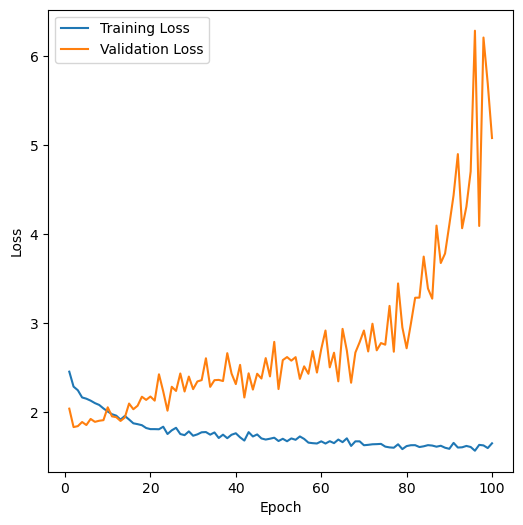

In [45]:
plt.figure(figsize=(6,6))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [47]:
np.argmin(val_loss)

1

In [48]:
y_pred = np.squeeze(model.predict(X_test))

result = RSquare()
result.update_state(y_test, y_pred)

print("R^2 Score: ", result.result())

104/104 [==============================] - 1s 4ms/step
R^2 Score:  tf.Tensor(0.049881876, shape=(), dtype=float32)


In [49]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 4ms/step - loss: 1.8159


1.815863013267517